## Exercise 05 : Boxplot

#### Import and read

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.read_csv('../data/ab-test.csv')
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


Построим график с указанными требованиями

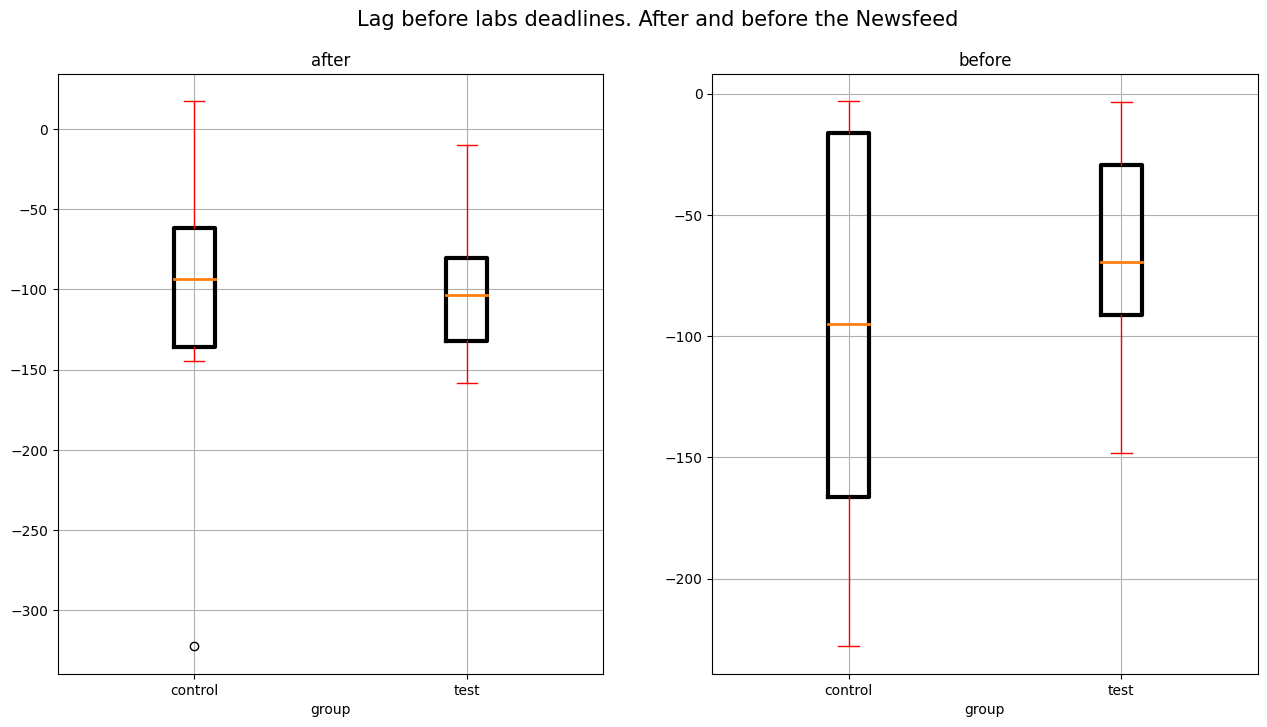

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8)) # 1 кол-во частей по вертикали, 2 по горизонтали
df[df['time'] == 'after'].boxplot(column='diff', # значения из колонки 'diff'
                                  by='group', # сгруппированы по значению 'group'
                                  ax=ax[0], # расположен в 0 секторе
                                  color=dict(boxes='#009e10', whiskers='red',
                                             medians='red', caps='red'), # цвета всех линий
                                  boxprops=dict(linewidth=3), # изменение толщины линии коробки
                                  medianprops=dict(linewidth=2)) # изменение толщины линии медианы
df[df['time'] == 'before'].boxplot(column='diff',
                                   by='group',
                                   ax=ax[1],
                                   color=dict(boxes='green', whiskers='red',
                                              medians='red', caps='red'),
                                   boxprops=dict(linewidth=3),
                                   medianprops=dict(linewidth=2))
ax[0].set_title('after')
ax[1].set_title('before')
fig.suptitle(
    'Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

Интерквартильный размах (IQR) — число, которое показывает разброс средней половины (т.е. средние 50%) набора данных и помогает определить выбросы

In [3]:
iqr = df[(df['time'] == 'before') & (df['group'] == 'control')].describe().loc['75%'].values[0] - \
    df[(df['time'] == 'before') & (df['group'] == 'control')
       ].describe().loc['25%'].values[0]
round(iqr / 10) * 10

150

In [4]:
iqr = df[(df['time'] == 'after') & (df['group'] == 'control')].describe().loc['75%'].values[0] - \
    df[(df['time'] == 'after') & (df['group'] == 'control')
       ].describe().loc['25%'].values[0]
round(iqr / 10) * 10

70

#### Вывод. IQR контрольной группы до появления ленты новостей примерно 150, а после появления ленты новостей примерно 70, что говорит о существенном уменьшении разброса значений